# Red Wine Quality Analysis

<img src="red_wine.jpg">

## Columns : 
### fixed acidity
The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.

### Volatile Acidity
Volatile Acidity is a measure of the low molecular weight (or steam distillable) fatty acids in wine and is generally perceived as the odour of vinegar.

### Citric acid
Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.

### Residual sugar
Residual sugar (or RS) refers to the sugars left unfermented in a finished wine.

### Chlorides
Chlorides It significantly contributes the wine's sensory characteristics, affecting color, clearness, flavor and aroma

### Sulfur Dioxide
Sulfur Dioxide (SO2) is the most common chemical compound used in winemaking. ... Sulfur serves two main purposes.

### Total Sulfur Dioxide
Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.

### Density
Density Quite obviously the density of wine juice is higher than water, it is thicker.

### pH
pH Typically, the pH level of a wine ranges from 3 to 4.

### sulphates
sulphates There are two types of sulfites, also known as sulfur dioxide: natural and added.

### alcohol
### quality

# Steps :
1. Importing Libraries

2. Loading the Dataset

3. Preprocessing dataset

4. Data Visualizaton

5. Modelling (Logistics Regrssion, DecisionTree, RandomForest, XGboost, KNN, SVM)

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
for i in df.columns:
    print("****************",i,"*************")
    print()
    print(set(df[i].tolist()))
    print()

**************** fixed acidity *************

{4.6, 5.6, 6.3, 7.1, 6.7, 7.9, 10.5, 7.3, 7.8, 7.4, 11.2, 7.5, 8.9, 8.5, 10.2, 10.1, 11.5, 12.8, 15.0, 14.0, 15.6, 5.0, 5.5, 6.5, 6.0, 7.0, 8.0, 9.0, 9.5, 10.0, 11.0, 12.0, 12.5, 13.5, 13.0, 15.5, 4.9, 5.4, 5.9, 6.9, 6.4, 8.4, 9.9, 9.4, 10.4, 10.9, 11.4, 11.9, 12.4, 12.9, 13.4, 15.9, 5.8, 5.3, 6.8, 8.3, 8.8, 8.7, 8.2, 9.3, 9.7, 9.2, 9.8, 10.7, 10.8, 10.3, 11.8, 11.3, 11.7, 12.2, 12.7, 12.3, 13.3, 13.8, 13.7, 13.2, 14.3, 4.7, 5.2, 5.7, 6.2, 7.7, 7.2, 5.1, 6.6, 6.1, 7.6, 8.1, 8.6, 9.6, 9.1, 10.6, 11.6, 11.1, 12.6, 12.1}

**************** volatile acidity *************

{0.7, 0.76, 0.28, 0.5, 0.615, 0.75, 0.625, 0.51, 0.885, 0.635, 1.09, 1.0, 0.84, 0.25, 0.875, 0.965, 1.18, 0.22, 0.54, 0.21, 0.665, 0.23, 0.915, 1.04, 0.79, 0.38, 0.63, 0.755, 0.47, 0.72, 0.595, 0.845, 1.025, 0.42, 0.43, 0.44, 0.45, 0.41, 0.18, 1.33, 0.2, 0.46, 0.795, 0.92, 1.58, 0.26, 0.305, 1.01, 0.35, 0.975, 0.85, 0.475, 0.69, 0.815, 0.565, 0.16, 0.675, 0.55, 0.8, 0.39, 0.64,

### Check the duplicates record

In [8]:
df.shape

(1599, 12)

In [9]:
df.duplicated().sum()

240

In [10]:
# removing the duplicates
df.drop_duplicates(keep = 'first',inplace = True, ignore_index = True)
df.shape

(1359, 12)

In [11]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Defining a new column 'Class' having value 1 where the quality of wine is greater than and equal to 7 else 0 where the quality of wine is less than 7.

In [12]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [13]:
df['Class'] = np.where(df['quality']>=7,1,0)

In [14]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   
5            7.9              0.60         0.06             1.6      0.069   
6            7.3              0.65         0.00             1.2      0.065   
7            7.8              0.58         0.02             2.0      0.073   
8            7.5              0.50         0.36             6.1      0.071   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   
5                 15.0                  59.0   0.9964  3.30       0.46   
6                 15.0                  21.0   0.9946  3.39       0.47   
7                  9.0                  18.0   0.9968  3.36       0.57   
8                 17.0                 102.0   0.9978  3.35       0.80   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Class  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0  
5      9.4        5      0  
6     10.0        7      1  
7      9.5        7      1  
8     10.5        5      0  
9      9.2        5      0

# Visualization


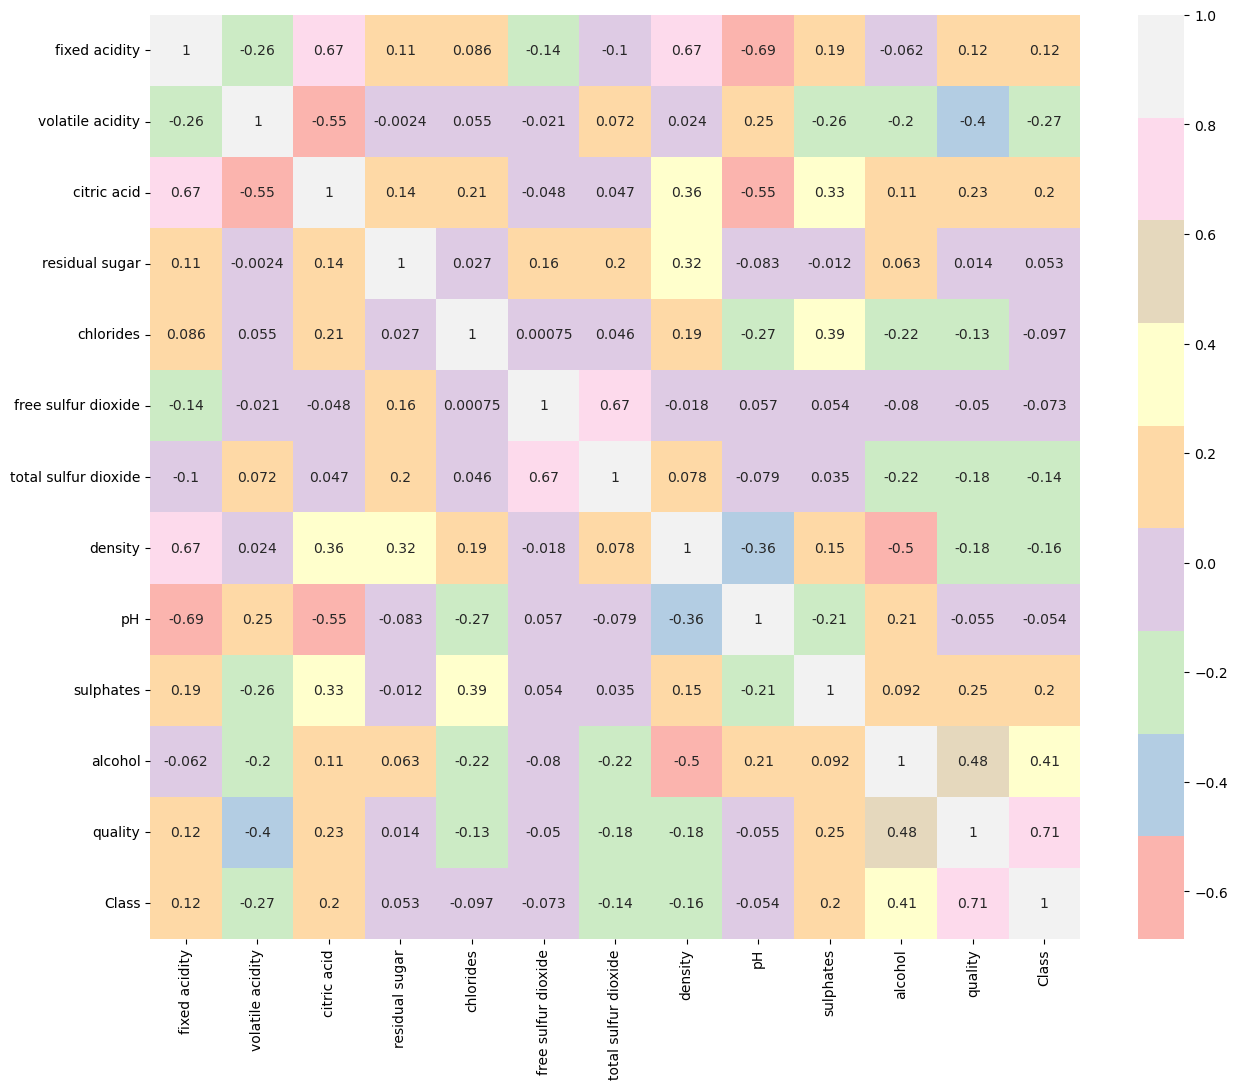

In [15]:
# heatmap of the data showing the corelation among columns
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, cmap = 'Pastel1')
plt.show()

<Figure size 1500x2000 with 0 Axes>

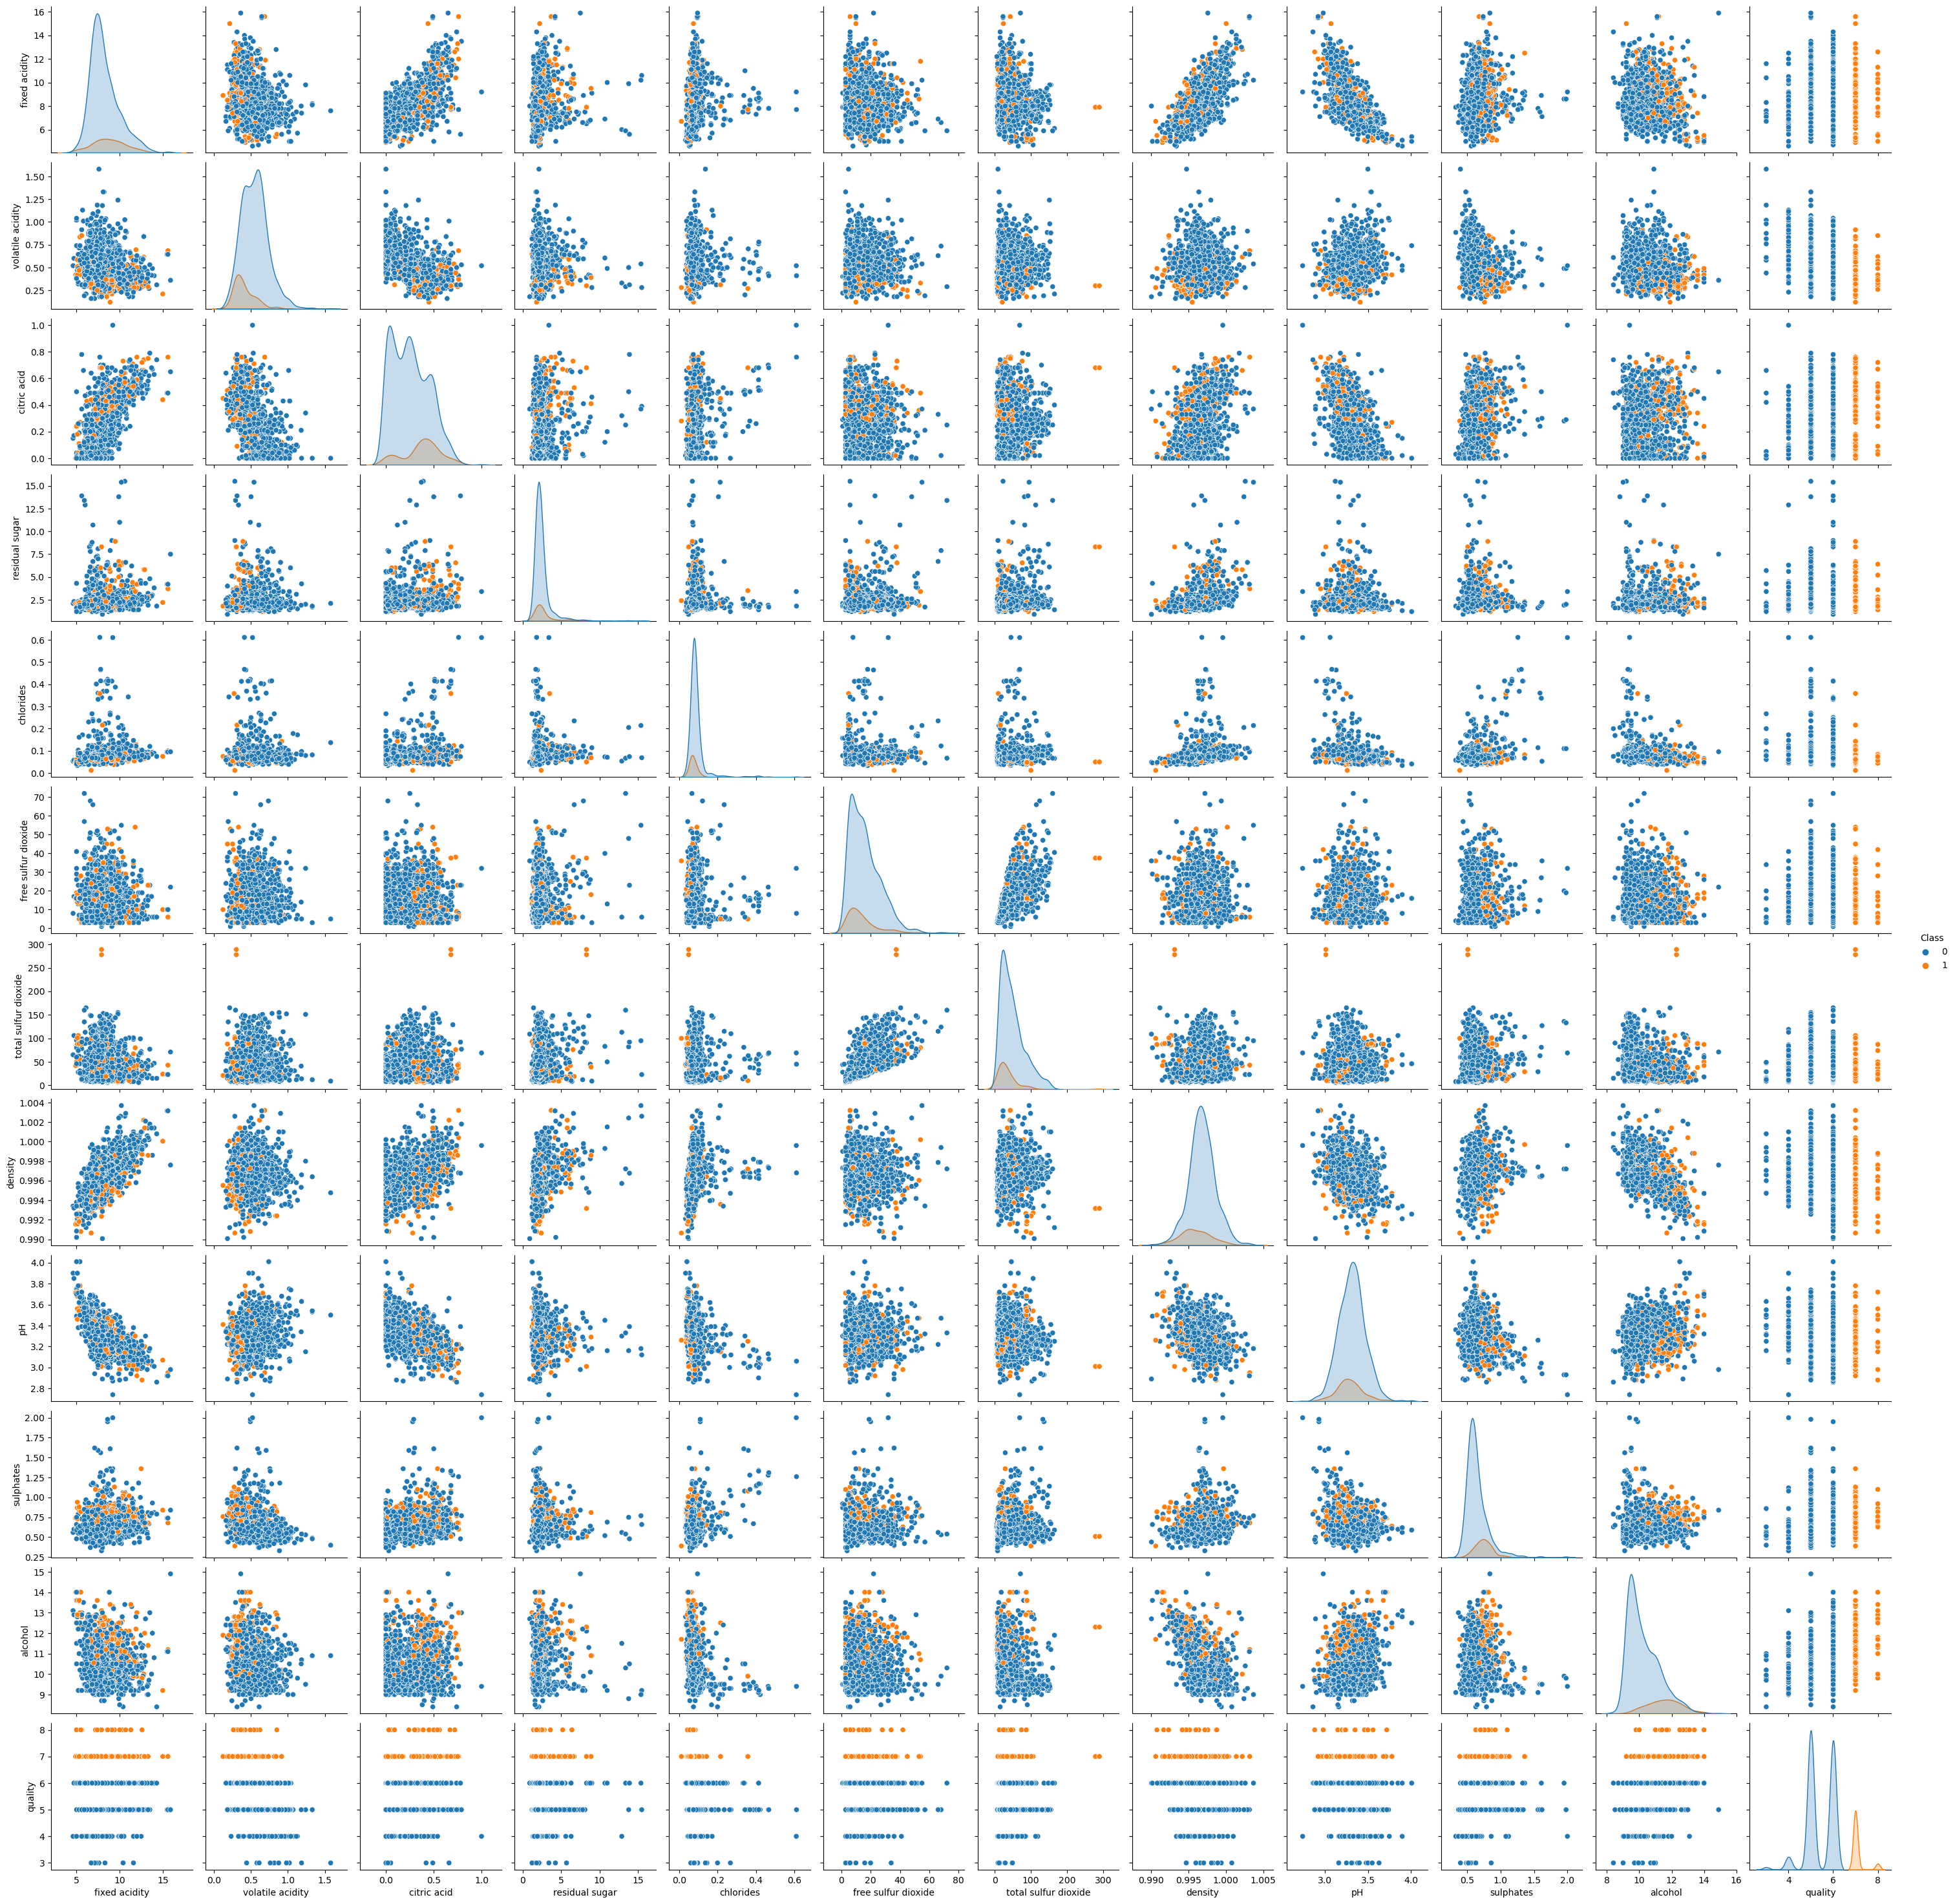

In [16]:
# pairplot of the data with respect to the Class(quality) of wine
plt.figure(figsize = (15,20))
sns.pairplot(data=df, hue='Class')
plt.show()

### Violinplot showing the distribution of the features and their effect on the quality of red wine

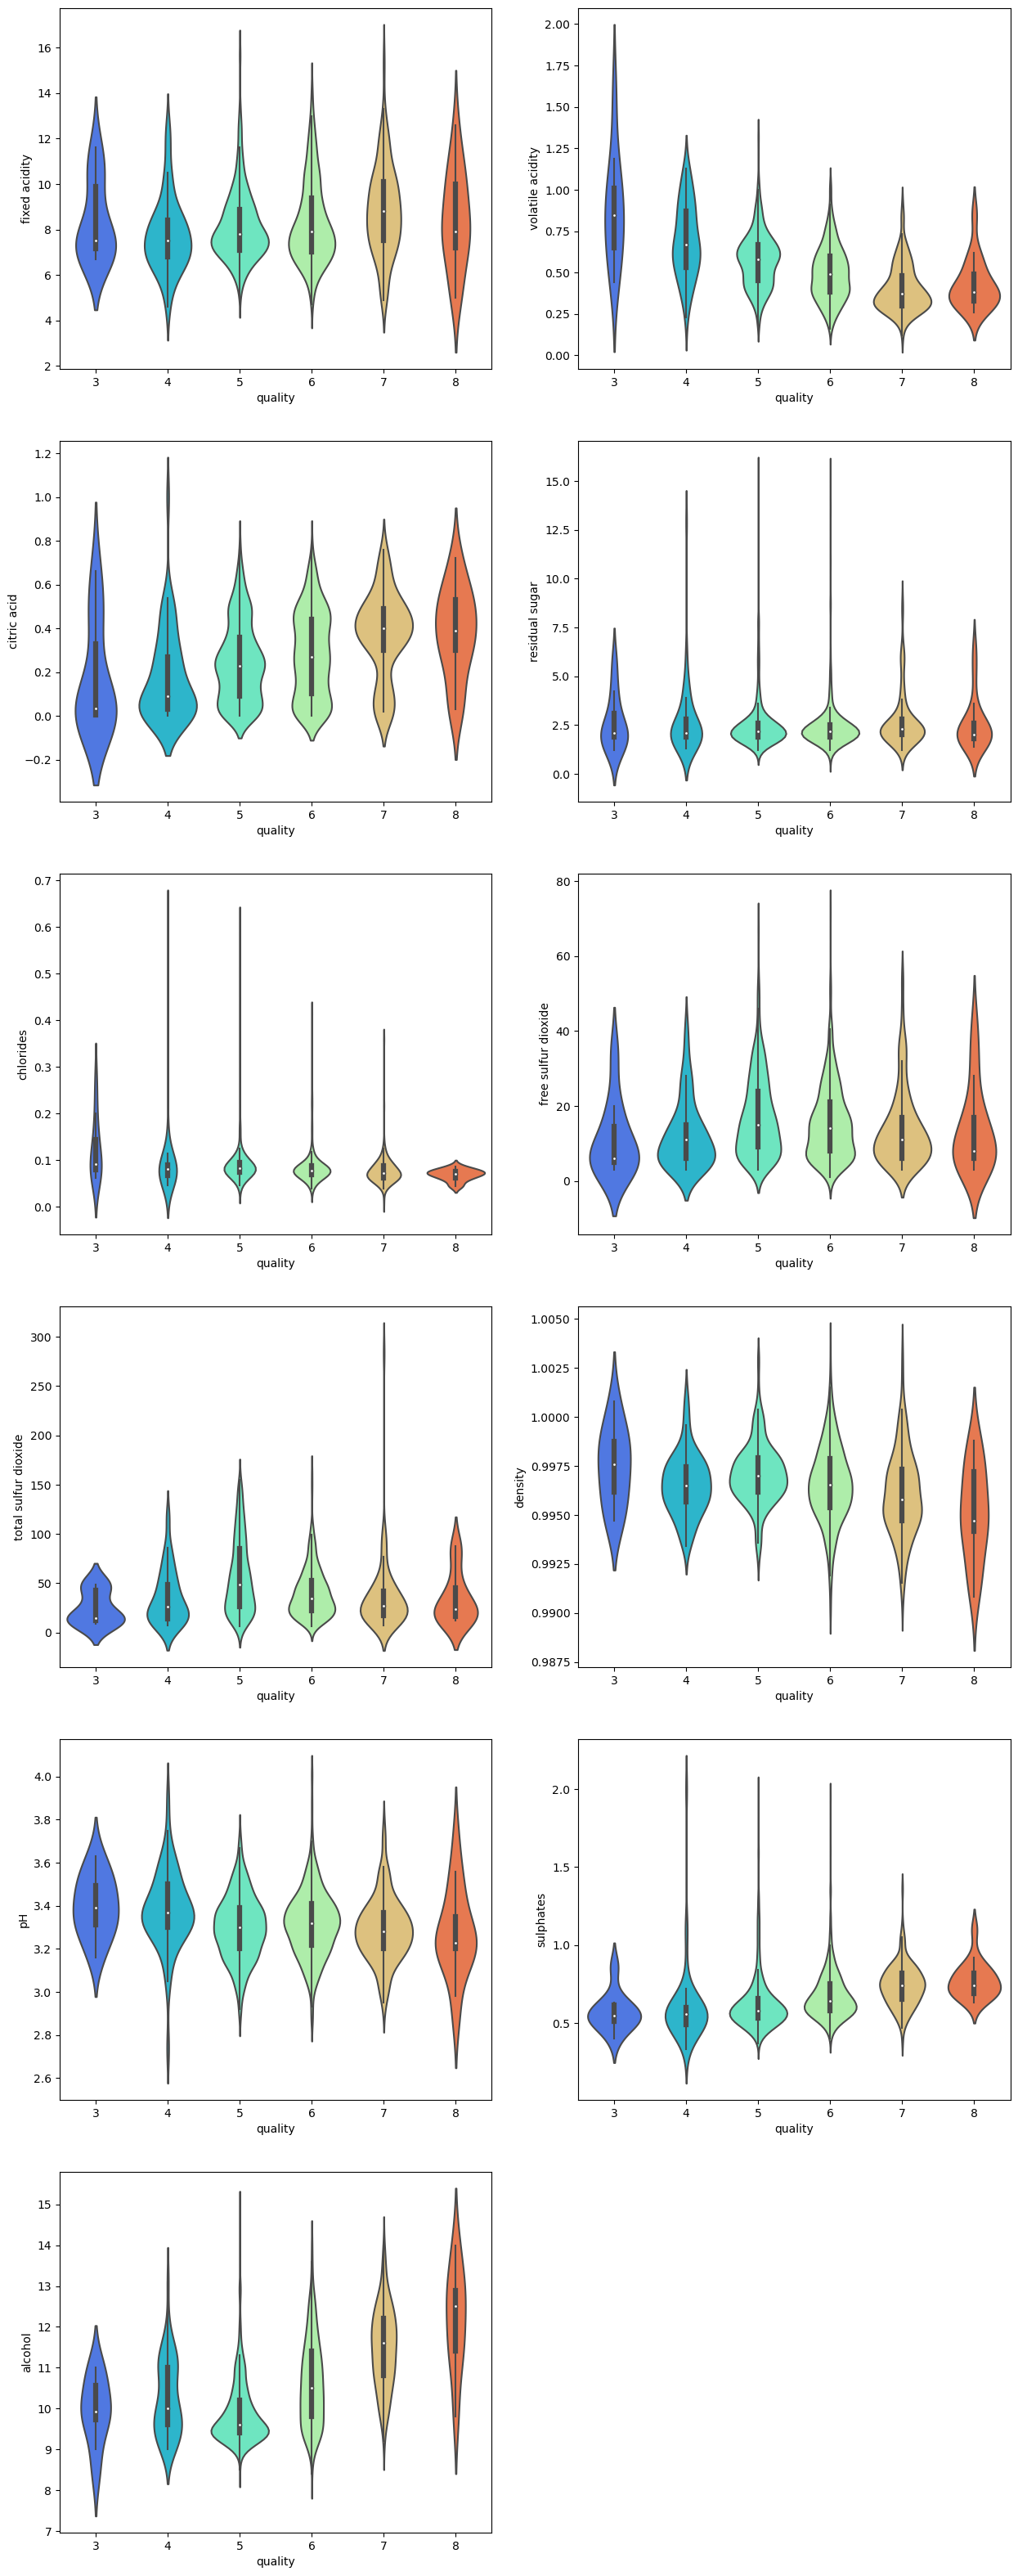

In [17]:
plt.figure(figsize=(15,150))
plot_number = 1
for i in list(df.select_dtypes(include=['float']).columns)[0:]:
    plt.subplot(22,2,plot_number)
    sns.violinplot(x="quality", y = i, data=df,palette='rainbow')
    plot_number+=1
plt.show()

### Conclusion from the above graphs :-
Citric Acid, chlorides, Alcohol have larger say in defining the quality of wine.

In [18]:
cmp = df.groupby('Class').mean()
cmp

fixed acidity  volatile acidity  citric acid  residual sugar  \
Class                                                                 
0           8.230809          0.548834     0.256587        2.495149   
1           8.820109          0.405870     0.372880        2.703804   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Class                                                                   
0       0.090014            16.194043             48.621702  0.996826   
1       0.076049            13.972826             35.358696  0.995963   

             pH  sulphates    alcohol   quality  
Class                                            
0      3.313106   0.645098  10.256851  5.393191  
1      3.288587   0.745598  11.552808  7.092391

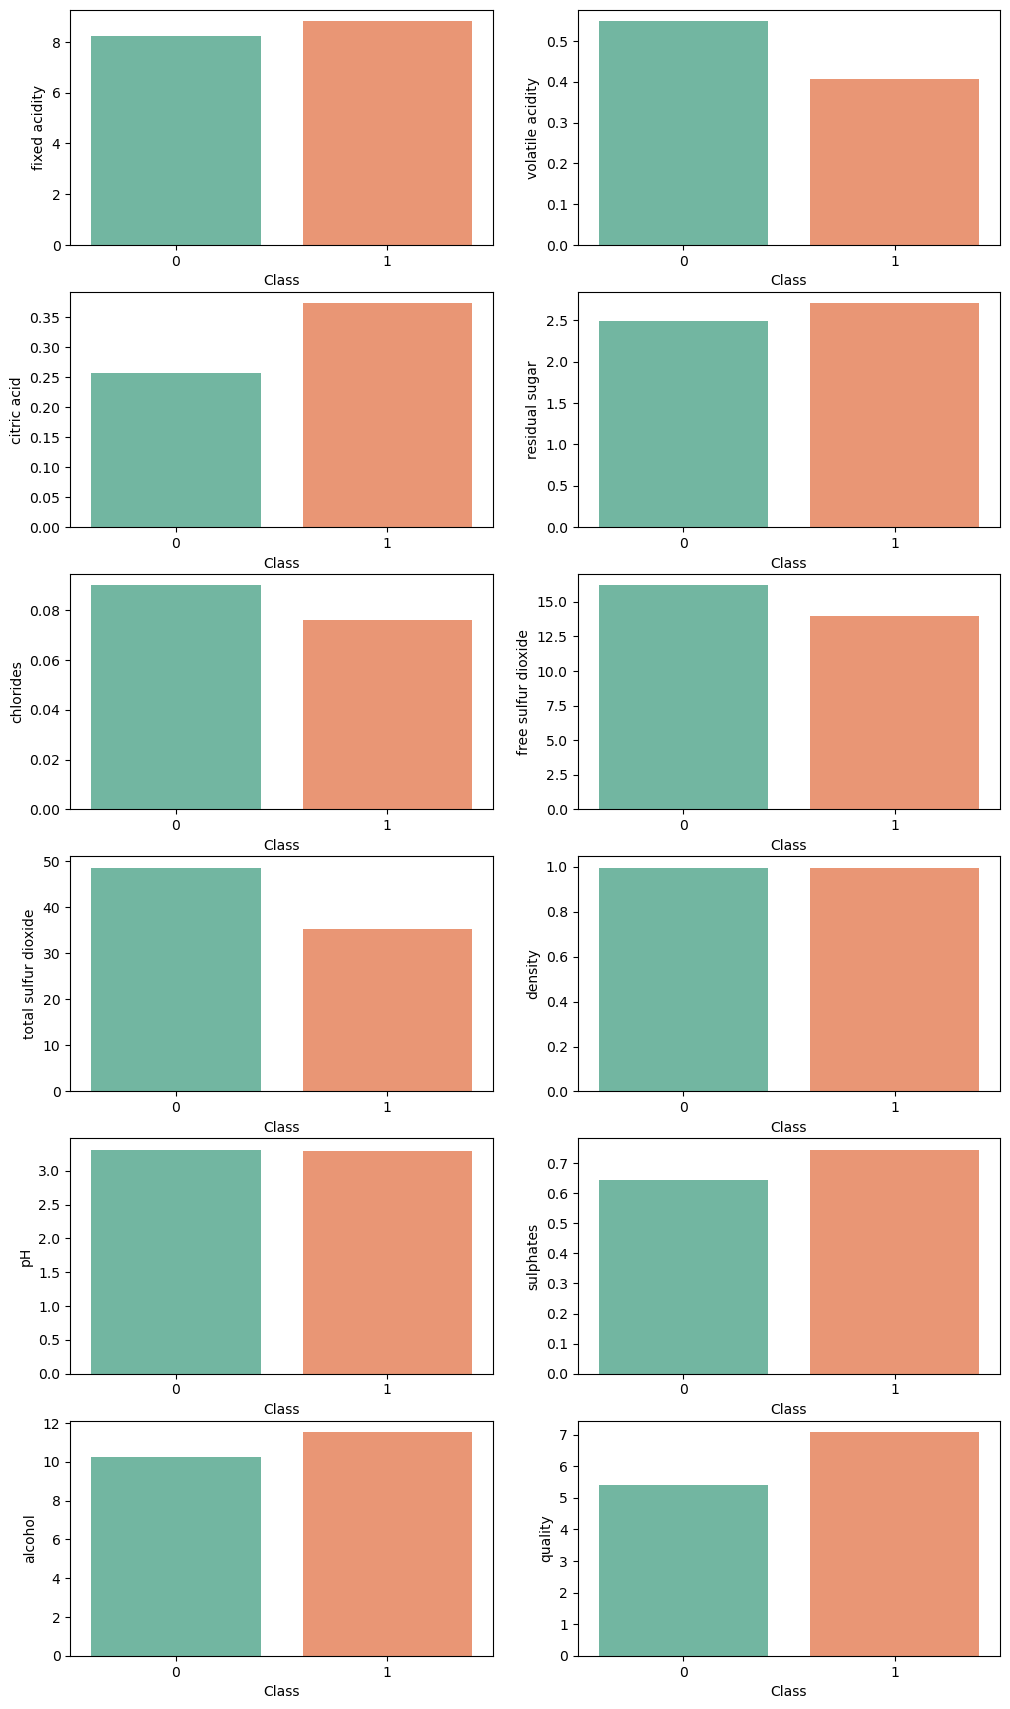

In [19]:
#visualizing the above table
plt.figure(figsize = (12,80))
plt_num = 1
for i in cmp.columns:
    plt.subplot(22,2,plt_num)
    sns.barplot(cmp.index,cmp[i], palette ='Set2')
    plt_num+=1
plt.show()

## Checking the balance/imbalance of data

In [20]:
df['Class'].value_counts() 

0    1175
1     184
Name: Class, dtype: int64

In [21]:
# Data is imbalance, we have to balance it prior building a model
good = df[df['Class']==1]
bad = df[df['Class']==0]

good = good.sample(bad.shape[0], replace=True)

print(bad.shape)
print(good.shape)

(1175, 13)
(1175, 13)


In [22]:
data = bad.append(good, ignore_index = True)
data.shape

(2350, 13)

## Scaling the data

In [23]:
df = df.drop('quality', axis = 1)

In [24]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  Class  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [25]:
# split the data into dependent and independent variable
x = data.drop('Class', axis = 1)
y = data['Class']

In [26]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [29]:
pd.DataFrame(x_scaler, columns = x.columns).head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.609866          1.255573    -1.562248       -0.500648  -0.170091   
1      -0.395486          2.268643    -1.562248        0.013888   0.335235   
2      -0.395486          1.593263    -1.363575       -0.206628   0.197419   
3       1.426746         -1.108258     1.219178       -0.500648  -0.193060   
4      -0.609866          1.030446    -1.562248       -0.574153  -0.193060   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.404603             -0.234160  0.697373  1.349660  -0.823802   
1             0.935721              0.712488  0.206380 -0.632853  -0.091025   
2            -0.021653              0.339566  0.304579 -0.249141  -0.274219   
3             0.169822              0.511684  0.795572 -0.888661  -0.701672   
4            -0.213128             -0.062042  0.697373  1.349660  -0.823802   

    alcohol   quality  
0 -1.250839 -1.275893  
1 -0.913963 -1.275893  
2 -0.913963 -1.275893  
3 -0.913963 -0.245179  
4 -1.250839 -1.275893

# MODELLING

In [30]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_scaler, y, test_size = 0.25, stratify = y, random_state = 42)

In [31]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(1762, 12) (588, 12) (1762,) (588,)


## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
#predictions
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [34]:
# Evaluate the metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
print(confusion_matrix(y_train,train_pred_lr))
print()
print(confusion_matrix(y_test,test_pred_lr))

[[881   0]
 [  0 881]]

[[294   0]
 [  0 294]]


In [36]:
print(classification_report(y_train,train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       294

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [37]:
train_accu = [] # list to store the accuracy value
test_accu = []
train_mean = []
test_mean = []

In [38]:
print(accuracy_score(y_train,train_pred_lr))
train_accu.append(accuracy_score(y_train,train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))
test_accu.append(accuracy_score(y_test,test_pred_lr))

1.0

1.0


In [39]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(lr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 8, max_features = 'auto',min_samples_leaf = 2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=2)

In [41]:
#predictions
train_pred_dtree = dtree.predict(x_train)
test_pred_dtree = dtree.predict(x_test)

In [42]:
print(confusion_matrix(y_train,train_pred_dtree))
print()
print(confusion_matrix(y_test,test_pred_dtree))

[[881   0]
 [  0 881]]

[[292   2]
 [  0 294]]


In [43]:
print(classification_report(y_train,train_pred_dtree))
print()
print(classification_report(y_test,test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       294
           1       0.99      1.00      1.00       294

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [44]:
print(accuracy_score(y_train,train_pred_dtree))
train_accu.append(accuracy_score(y_train,train_pred_dtree))
print()
print(accuracy_score(y_test,test_pred_dtree))
test_accu.append(accuracy_score(y_test,test_pred_dtree))

1.0

0.9965986394557823


In [45]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree,x_train, y_train, cv=10)
test_accuracy = cross_val_score(dtree,x_train, y_train, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.98870056 0.96610169 1.         1.         1.         1.
 1.         1.         1.         0.92613636]

Train Mean Accuracy 0.9880938623523369

Train Max Accuracy 1.0

Test Accuracy [1.         0.98870056 1.         1.         1.         1.
 1.         1.         1.         0.97727273]

Test Mean Accuracy 0.9965973292244478

Test Max Accuracy 1.0


## Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf= 1, min_samples_split= 2, random_state=200)
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=200)

In [47]:
#predictions
train_pred_rfr = rfr.predict(x_train)
test_pred_rfr = rfr.predict(x_test)

In [48]:
print(confusion_matrix(y_train,train_pred_rfr))
print()
print(confusion_matrix(y_test,test_pred_rfr))

[[881   0]
 [  0 881]]

[[294   0]
 [  0 294]]


In [49]:
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       294

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [50]:
print(accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print(accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

1.0

1.0


In [51]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rfr, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## XGBOOST

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
#predictions
train_pred_xgb = xgb.predict(x_train)
test_pred_xgb = xgb.predict(x_test)

In [54]:
print(confusion_matrix(y_train,train_pred_xgb))
print()
print(confusion_matrix(y_test,test_pred_xgb))

[[881   0]
 [  0 881]]

[[294   0]
 [  0 294]]


In [55]:
print(classification_report(y_train,train_pred_xgb))
print()
print(classification_report(y_test,test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       294

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [56]:
print(accuracy_score(y_train,train_pred_xgb))
train_accu.append(accuracy_score(y_train,train_pred_xgb))
print()
print(accuracy_score(y_test,test_pred_xgb))
test_accu.append(accuracy_score(y_test,test_pred_xgb))

1.0

1.0


In [57]:
# cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Mean Accuracy 1.0

Test Max Accuracy 1.0


## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

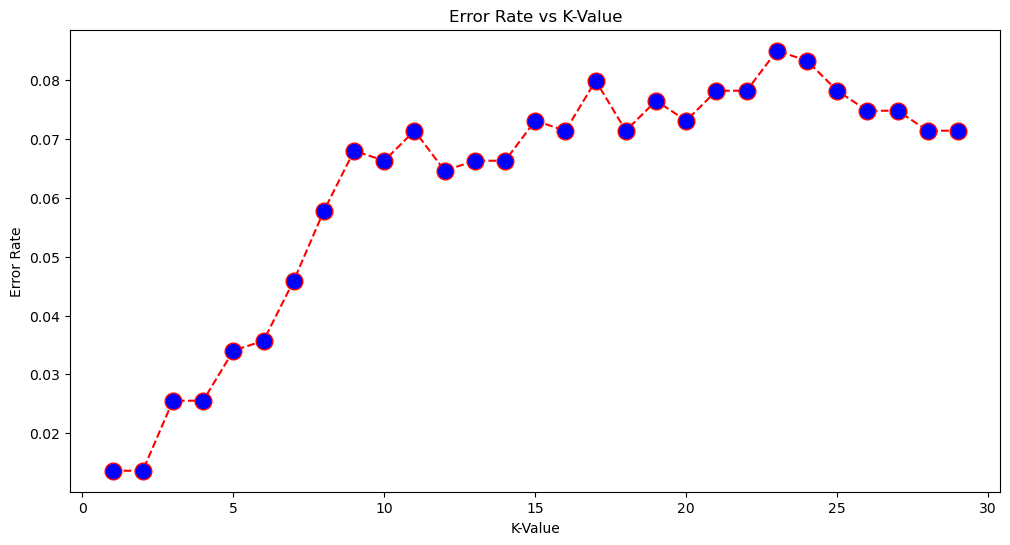

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error_rate, color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
#predictions
train_pred_knn = knn.predict(x_train)
test_pred_knn = knn.predict(x_test)

In [63]:
print(confusion_matrix(y_train,train_pred_knn))
print()
print(confusion_matrix(y_test,test_pred_knn))

[[881   0]
 [  0 881]]

[[286   8]
 [  0 294]]


In [64]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       294
           1       0.97      1.00      0.99       294

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588



In [65]:
print(accuracy_score(y_train,train_pred_knn))
print()
train_accu.append(accuracy_score(y_train,train_pred_knn))
print(accuracy_score(y_test,test_pred_knn))
test_accu.append(accuracy_score(y_test,test_pred_knn))

1.0

0.9863945578231292


In [66]:
# cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.98870056 1.         0.96590909 0.98295455 0.98863636 0.98863636
 0.99431818 0.98863636 0.98863636 0.98295455]

Train Mean Accuracy 0.9869382383153569

Train Max Accuracy 1.0

Test Accuracy [0.93220339 0.94915254 0.93220339 0.91525424 0.94915254 0.98305085
 0.98305085 0.96610169 0.96551724 0.9137931 ]

Test Mean Accuracy 0.948947983635301

Test Max Accuracy 0.9830508474576272


## SVM

In [67]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train,y_train)

SVC()

In [68]:
#predictions
train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(x_test)

In [69]:
print(confusion_matrix(y_train,train_pred_svm))
print()
print(confusion_matrix(y_test,test_pred_svm))

[[881   0]
 [  0 881]]

[[294   0]
 [  0 294]]


In [70]:
print(classification_report(y_train,train_pred_svm))
print()
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       881
           1       1.00      1.00      1.00       881

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       294

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [71]:
print(accuracy_score(y_train,train_pred_svm))
train_accu.append(accuracy_score(y_train,train_pred_svm))
print()
print(accuracy_score(y_test,test_pred_svm))
test_accu.append(accuracy_score(y_test,test_pred_svm))

1.0

1.0


In [72]:
# cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(svm, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Train Mean Accuracy 1.0

Train Max Accuracy 1.0

Test Accuracy [1.         1.         1.         1.         0.98305085 1.
 1.         0.98305085 0.98275862 1.        ]

Test Mean Accuracy 0.9948860315604909

Test Max Accuracy 1.0


# Finding the best model
 Accuracy Comparison of different algorithms on training data and testing data

In [73]:
algorithm = ['LogisticRegression','DecisionTree','RandomForest', 'XGBOOST','KNN','SVM']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu, 'Train Mean':train_mean, 'Test Mean':test_mean}
model = pd.DataFrame(accu_data, index = algorithm)
model

Training Accuracy  Test Accuracy  Train Mean  Test Mean
LogisticRegression                1.0       1.000000    1.000000   1.000000
DecisionTree                      1.0       0.996599    0.988094   0.996597
RandomForest                      1.0       1.000000    1.000000   1.000000
XGBOOST                           1.0       1.000000    1.000000   1.000000
KNN                               1.0       0.986395    0.986938   0.948948
SVM                               1.0       1.000000    1.000000   0.994886

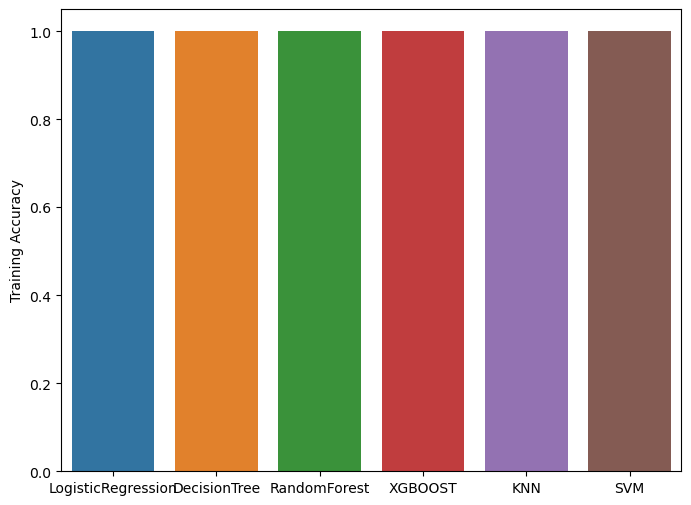

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Training Accuracy'])
plt.show()

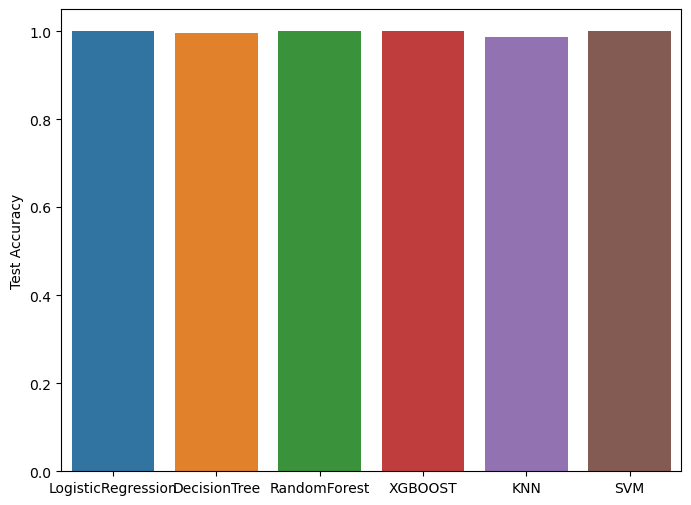

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(model.index, model['Test Accuracy'])
plt.show()